# SVM for classification

Load IRIS dataset, check its contents:


In [5]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print("Target: ", iris.target)
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [19]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [22]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [55]:
import matplotlib.pyplot as plt
import numpy as np


X = iris.data[:,0:2]
y = iris.target

X, y = X[y<2], y[y<2]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

SVMmodel_1=SVC(kernel='linear', C=100)
SVMmodel_1.fit(X_train,y_train)
print(SVMmodel_1.get_params())
SVMmodel_1.score(X_test,y_test)




(80, 2)
(20, 2)
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


1.0

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

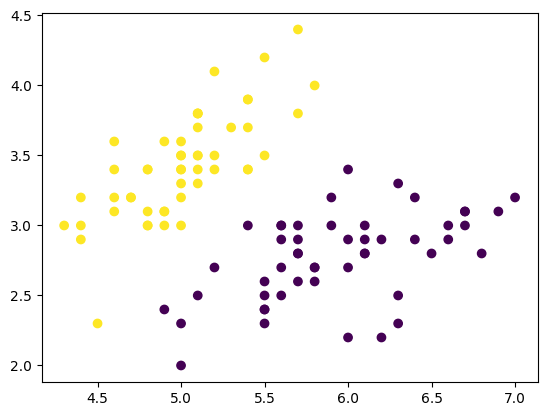

In [50]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y<1 )



Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 6.31504379 -5.26305592]]
[-17.31228841]


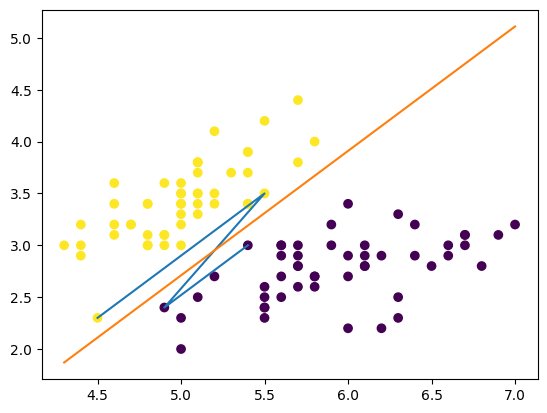

In [56]:
supvectors=SVMmodel_1.support_vectors_
# Plot the support vectors here
plt.plot(supvectors[:,0], supvectors[:,1])
plt.scatter(X[:,0], X[:,1], c = y<1 )
#Separating line coefficients:
W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_
print(W)
print(b)

x0 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 10)


x1 = -(W[0,0]*x0 + b)/W[0,1]

plt.plot(x0,x1)

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

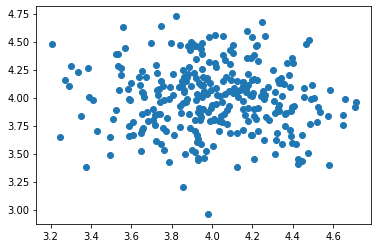

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

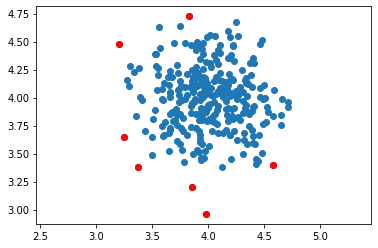

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

NameError: ignored